# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, dinner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
from seaborn import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Carregando a base de dados


tips = load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [9]:
# Usando o patsy para obter as matrizes de X e y

y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 0', data=tips)

In [10]:
X

DesignMatrix with shape (244, 5)
  sex[Male]  sex[Female]  smoker[T.No]  time[T.Dinner]  net_bill
          0            1             1               1     15.98
          1            0             1               1      8.68
          1            0             1               1     17.51
          1            0             1               1     20.37
          0            1             1               1     20.98
          1            0             1               1     20.58
          1            0             1               1      6.77
          1            0             1               1     23.76
          1            0             1               1     13.08
          1            0             1               1     11.55
          1            0             1               1      8.56
          0            1             1               1     30.26
          1            0             1               1     13.85
          1            0             1               1   

In [11]:
y

DesignMatrix with shape (244, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  4.71
  2.00
  3.12
  1.96
  3.23
  1.71
  5.00
  1.57
  3.00
  3.02
  3.92
  1.67
  3.71
  3.50
  3.35
  4.08
  2.75
  2.23
  7.58
  3.18
  2.34
  2.00
  2.00
  4.30
  3.00
  [214 rows omitted]
  Terms:
    'tip' (column 0)
  (to view full data, use np.asarray(this_obj))

In [12]:
# Utilizando o statsmodel para realizar a modelagem dos dados

modelo = sm.OLS(y, X).fit()

In [13]:
# Dados obtidos da modelagem

# Para realizar a remoção das variáveis não significantes será utilizado o critério de p-value, as variáveis que apresentarem p-value com valor acima de 5% não apresentam significância estatística para modelagem.

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           2.64e-20
Time:                        18:22:33   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
sex[Male]          1.1999      0.242      4.952      0.000       0.723       1.677
sex[Female]        1.1965      0.229      5.215      0.000       0.744       1.648
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         85.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Remoção de time da modelagem dado que ele apresenta o pior p-value

# Após remover time da modelagem nada mudou no valor de R², reforçando a hipótese de que sex não tem significancia para modelagem

y, X = patsy.dmatrices('tip ~ sex + smoker + net_bill + 0', data=tips)

modelo = sm.OLS(y, X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     40.28
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           4.03e-21
Time:                        18:57:42   Log-Likelihood:                -375.19
No. Observations:                 244   AIC:                             758.4
Df Residuals:                     240   BIC:                             772.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sex[Male]        1.2386      0.215      5.768      0.000       0.816       1.662
sex[Female]      1.2252      0.214      5.735      0.000       0.804       1.646
smoker[T.No]     0.1383      0.150      0.920      0.359      -0.158       0.434
net_bill         0.1000      0.009     10.862      0.000       0.082       0.118
==============================================================================
Omnibus:                       36.851   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.361
Skew:                           0.807   Prob(JB):                     3.89e-15
Kurtosis:                       4.981   Cond. No.                         76.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Remoção da variável smoker

# Remover a variável da modelagem diminuiu ligeiramente o valor de R²

# Obs.: Remover a variável sex da modelagem eleva o valor de R², contudo se for retirada o exercício deixa de ser uma regressão múltipla.

y, X = patsy.dmatrices('tip ~ sex + net_bill + 0', data=tips)

modelo = sm.OLS(y, X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     60.04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           6.94e-22
Time:                        18:59:47   Log-Likelihood:                -375.62
No. Observations:                 244   AIC:                             757.2
Df Residuals:                     241   BIC:                             767.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sex[Male]       1.3382      0.185      7.218      0.000       0.973       1.703
sex[Female]     1.3232      0.185      7.149      0.000       0.959       1.688
net_bill        0.0992      0.009     10.827      0.000       0.081       0.117
==============================================================================
Omnibus:                       33.672   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.346
Skew:                           0.752   Prob(JB):                     1.30e-13
Kurtosis:                       4.892   Cond. No.                         61.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

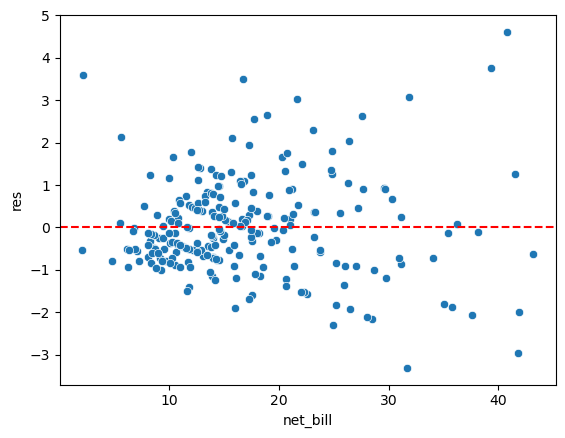

In [35]:
# Plot do gráfico de resíduos

tips['res'] = modelo.resid

sns.scatterplot(x='net_bill', y='res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [36]:
# Modelagem de dados com log de net_bill

# A modelagem do net_bill mantem a significância estatística das variáveis, contudo apresenta um R² menor

y, X = patsy.dmatrices('tip ~ smoker + np.log(net_bill) + 0', data=tips)

modelo = sm.OLS(y, X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           5.38e-19
Time:                        18:59:51   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
smoker[Yes]         -1.2890      0.445     -2.896      0.004      -2.166      -0.412
smoker[No]          -1.2456      0.433     -2.878      0.004      -2.098      -0.393
np.log(net_bill)     1.5712      0.157     10.034      0.000       1.263       1.880
==============================================================================
Omnibus:                       75.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.823
Skew:                           1.320   Prob(JB):                     3.38e-50
Kurtosis:                       6.929   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

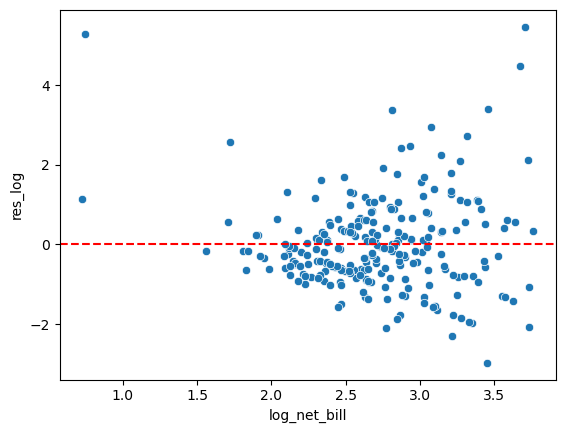

In [37]:
# plot do resíduo

# O resíduo em escala logaritmica está menos disperso

tips['log_net_bill'] = np.log(tips['net_bill'])

tips['res_log'] = modelo.resid

sns.scatterplot(x='log_net_bill', y='res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [38]:
# Modelagem de dados com log de net_bill

# O valor de R² ficou entre o net_bill e log(net_bill)

y, X = patsy.dmatrices('tip ~ smoker + np.power(net_bill, 2) + 0', data=tips)

modelo = sm.OLS(y, X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     52.69
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           1.04e-19
Time:                        18:59:56   Log-Likelihood:                -380.70
No. Observations:                 244   AIC:                             767.4
Df Residuals:                     241   BIC:                             777.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
smoker[Yes]               2.1421      0.147     14.586      0.000       1.853       2.431
smoker[No]                2.3117      0.115     20.057      0.000       2.085       2.539
np.power(net_bill, 2)     0.0022      0.000     10.265      0.000       0.002       0.003
==============================================================================
Omnibus:                       25.317   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.501
Skew:                           0.672   Prob(JB):                     1.95e-08
Kurtosis:                       4.298   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

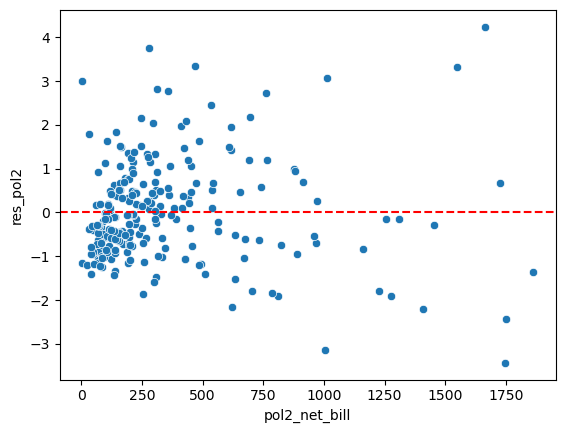

In [39]:
# plot do resíduo

# Modelando net_bill como um polinômio de segundo grau ocorreu novamente uma dispersão maior do resíduo

tips['pol2_net_bill'] = np.power(tips['net_bill'], 2)

tips['res_pol2'] = modelo.resid

sns.scatterplot(x='pol2_net_bill', y='res_pol2', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

## Resposta:

Levando-se em consideração o valor de R², o modelo que descreve melhor os dados é o net_bill.

---

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [47]:
# Para modelagem do log de tip será realizado os mesmos passos descritos acima.

# Antes de mais nada irei carregar novamente a base de dados.

tips = load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

In [48]:
# Modelagem dos dados

y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill + 0', data=tips)

In [49]:
# Usando o stasmodels para obter as estatísticas da modelagem

# Analisando as variáveis observa-se que a variável time e smoker não apresentam significância estatística

modelo_1 = sm.OLS(y, X).fit()
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           1.21e-18
Time:                        19:11:00   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
sex[Male]          0.4504      0.078      5.801      0.000       0.297       0.603
sex[Female]        0.4552      0.074      6.192      0.000       0.310       0.600
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         85.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Removendo time da modelagem

# A remoção da variável não alterou o valor de R²

y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + net_bill + 0', data=tips)

modelo_1 = sm.OLS(y, X).fit()
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     36.43
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           1.95e-19
Time:                        19:11:02   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             203.0
Df Residuals:                     240   BIC:                             217.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sex[Male]        0.4631      0.069      6.730      0.000       0.328       0.599
sex[Female]      0.4646      0.068      6.788      0.000       0.330       0.599
smoker[T.No]     0.0429      0.048      0.891      0.374      -0.052       0.138
net_bill         0.0305      0.003     10.347      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.323   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                1.981
Skew:                          -0.169   Prob(JB):                        0.371
Kurtosis:                       3.285   Cond. No.                         76.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Removendo time da modelagem

# A remoção da variável diminuiu ligeiramente o valor de R²

y, X = patsy.dmatrices('np.log(tip) ~ sex + net_bill + 0', data=tips)

modelo_1 = sm.OLS(y, X).fit()
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     54.29
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           3.43e-20
Time:                        19:11:04   Log-Likelihood:                -97.885
No. Observations:                 244   AIC:                             201.8
Df Residuals:                     241   BIC:                             212.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sex[Male]       0.4940      0.059      8.317      0.000       0.377       0.611
sex[Female]     0.4950      0.059      8.348      0.000       0.378       0.612
net_bill        0.0303      0.003     10.313      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.873   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                2.511
Skew:                          -0.215   Prob(JB):                        0.285
Kurtosis:                       3.250   Cond. No.                         61.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Como utilizamos o log da variável resposta, precisamos realizar uma operação antes de usar fittedvalues
# Precisamos calcular o exponencial do fittedvalues

tips['pred_net_bill'] = np.exp(modelo_1.fittedvalues)

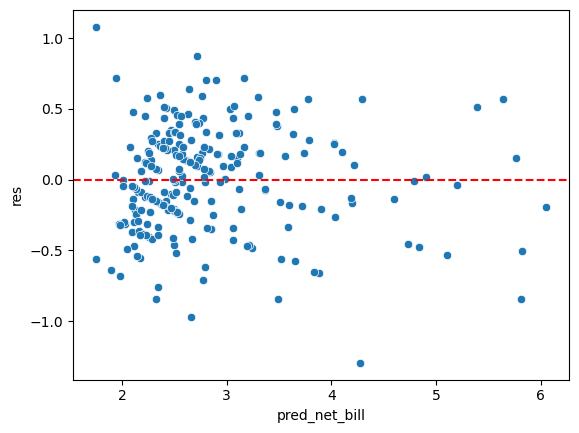

In [53]:
# Plot da dispersão do residuo

# Utilizar o log no tip reduziu a amplitude do resíduo

tips['res'] = modelo_1.resid

sns.scatterplot(x='pred_net_bill', y='res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [54]:
# Modelagem com log de net_bill

# O valor de R² aumentou e as variáveis continuam apresentando significância estatística

y, X = patsy.dmatrices('np.log(tip) ~ sex + np.log(net_bill) + 0', data=tips)

modelo_1 = sm.OLS(y, X).fit()
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     56.50
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           7.55e-21
Time:                        19:17:11   Log-Likelihood:                -96.353
No. Observations:                 244   AIC:                             198.7
Df Residuals:                     241   BIC:                             209.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
sex[Male]           -0.3975      0.139     -2.870      0.004      -0.670      -0.125
sex[Female]         -0.3932      0.134     -2.936      0.004      -0.657      -0.129
np.log(net_bill)     0.5158      0.049     10.524      0.000       0.419       0.612
==============================================================================
Omnibus:                       12.789   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.604
Skew:                           0.143   Prob(JB):                     6.15e-07
Kurtosis:                       4.653   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Modelagem com polinômio de segundo grau

# O valor de R² diminui consideravelmente comparado aos demais modelos.

y, X = patsy.dmatrices('np.log(tip) ~ sex + np.power(net_bill, 2) + 0', data=tips)

modelo_1 = sm.OLS(y, X).fit()
modelo_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     40.22
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           8.49e-16
Time:                        19:18:09   Log-Likelihood:                -108.13
No. Observations:                 244   AIC:                             222.3
Df Residuals:                     241   BIC:                             232.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
sex[Male]                 0.7949      0.040     19.802      0.000       0.716       0.874
sex[Female]               0.7816      0.045     17.304      0.000       0.693       0.871
np.power(net_bill, 2)     0.0006   6.93e-05      8.853      0.000       0.000       0.001
==============================================================================
Omnibus:                        2.496   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                2.551
Skew:                          -0.239   Prob(JB):                        0.279
Kurtosis:                       2.853   Cond. No.                         995.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Resposta:

O melhor modelo, que apresentou o maior valor de R² e manteve a significância estatística das variáveis é o log de net_bill.

---

## Resposta:

Comparando o melhor modelo de tip e log tip, log tip apresentou o melhor valor de R² explicando melhor os dados.

---

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [56]:
# Importando a base de dados de previsão

caminho = r"C:\Users\kenji\OneDrive\Documentos\EBAC\Ciêntista de dados\Módulo 12\previsao_de_renda.csv"

df = pd.read_csv(caminho)

In [58]:
df.head()

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [60]:
# Antes de iniciar qualquer analise deve-se realizar um estudo da base de dados, em outras palavras realizar o tratamento da base de dados.

# Como pode-se observar a variável tempo_emprego apresenta dados faltantes.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [94]:
# Como a base de dados é bem extensa irei remover as linhas com dados faltantes

df = df.dropna()
df = df.reset_index()

In [95]:
# Agora irei remover os possiveis dados duplicados.

df = df.drop_duplicates()

In [107]:
# Como a base de dados é bem grande, mesmo após a limpeza irei utilizar apenas 70% do banco de dados.

df_1 = df.copy()


In [108]:
df_1 = df_1.loc[:8699, :]

In [110]:
# Com a base de dados pronta, pode-se iniciar a análise de regressão linear

# Modelagem dos dados

# A regressão linear apresentou um R² de 0.411

y, X = patsy.dmatrices('renda ~ tempo_emprego + 0', data=df_1)

modelo_2 = sm.OLS(y, X).fit()
modelo_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  renda   R-squared (uncentered):                   0.411
Model:                            OLS   Adj. R-squared (uncentered):              0.411
Method:                 Least Squares   F-statistic:                              6076.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):                        0.00
Time:                        21:06:46   Log-Likelihood:                         -90705.
No. Observations:                8700   AIC:                                  1.814e+05
Df Residuals:                    8699   BIC:                                  1.814e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
tempo_emprego   669.0162      8.583     77.950      0.000     652.192     685.840
==============================================================================
Omnibus:                    10734.905   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2890445.037
Skew:                           6.447   Prob(JB):                         0.00
Kurtosis:                      91.359   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='renda', ylabel='res'>

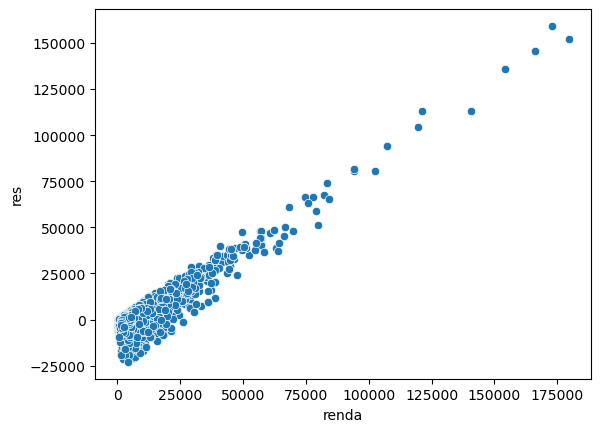

In [111]:
# Plot do resíduo

# Como visto nesse módulo, uma maneira de melhorar a regressão, pode-se aplicar o log/exp/power na variável explicativa e/ou na variável resposta

df_1['res'] = modelo_2.resid
sns.scatterplot(x='renda', y='res', data = df_1)

In [112]:
# Caso seja aplicado log na renda observa-se um aumento no valor do R²

y, X = patsy.dmatrices('np.log(renda) ~ tempo_emprego + 0', data=df_1)

modelo_3 = sm.OLS(y, X).fit()
modelo_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          np.log(renda)   R-squared (uncentered):                   0.609
Model:                            OLS   Adj. R-squared (uncentered):              0.609
Method:                 Least Squares   F-statistic:                          1.353e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):                        0.00
Time:                        21:06:58   Log-Likelihood:                         -26691.
No. Observations:                8700   AIC:                                  5.338e+04
Df Residuals:                    8699   BIC:                                  5.339e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
tempo_emprego     0.6366      0.005    116.326      0.000       0.626       0.647
==============================================================================
Omnibus:                     2698.519   Durbin-Watson:                   1.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7892.790
Skew:                          -1.630   Prob(JB):                         0.00
Kurtosis:                       6.338   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
# Usando o patsy para realizar uma regressão múlpipla com diversas variáveis

# Nesta análise não serão utilizados 'data_ref' e 'index', poisnão irão agregar positivamente a regressão

# Utilizarei log de renda, pois apresentou o melhor valor de R² durante a análise realizada anteriormente

# Analisando as estatísticas diversas variáveis não apresentam significância estatística

y, X = patsy.dmatrices('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + 0', data=df_1)

modelo_4 = sm.OLS(y, X).fit()
modelo_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     211.7
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:15:04   Log-Likelihood:                -9449.6
No. Observations:                8700   AIC:                         1.895e+04
Df Residuals:                    8676   BIC:                         1.912e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
sexo[F]                              7.2184      0.112     64.349      0.000       6.999       7.438
sexo[M]                              8.0070      0.111     71.924      0.000       7.789       8.225
posse_de_veiculo[T.True]             0.0355      0.017      2.106      0.035       0.002       0.069
posse_de_imovel[T.True]              0.0774      0.017      4.654      0.000       0.045       0.110
tipo_renda[T.Bolsista]               0.1001      0.294      0.341      0.733      -0.476       0.676
tipo_renda[T.Empresário]             0.1567      0.018      8.807      0.000       0.122       0.192
tipo_renda[T.Pensionista]           -0.3024      0.272     -1.111      0.267      -0.836       0.231
tipo_renda[T.Servidor público]       0.0510      0.027      1.921      0.055      -0.001       0.103
educacao[T.Pós graduação]            0.1955      0.204      0.956      0.339      -0.205       0.596
educacao[T.Secundário]              -0.0338      0.086     -0.394      0.693      -0.202       0.134
educacao[T.Superior completo]        0.0913      0.086      1.059      0.290      -0.078       0.260
educacao[T.Superior incompleto]     -0.0310      0.093     -0.333      0.739      -0.213       0.151
estado_civil[T.Separado]             0.0461      0.033      1.405      0.160      -0.018       0.111
estado_civil[T.Solteiro]            -0.0148      0.024     -0.605      0.545      -0.063       0.033
estado_civil[T.União]               -0.0197      0.030     -0.649      0.516      -0.079       0.040
estado_civil[T.Viúvo]                0.0688      0.049      1.395      0.163      -0.028       0.166
tipo_residencia[T.Casa]             -0.0580      0.064     -0.906      0.365      -0.183       0.067
tipo_residencia[T.Com os pais]      -0.0289      0.072     -0.403      0.687      -0.169       0.111
tipo_residencia[T.Comunitário]      -0.1055      0.123     -0.859      0.391      -0.347       0.135
tipo_residencia[T.Estúdio]           0.0050      0.118      0.042      0.966      -0.227       0.237
tipo_residencia[T.Governamental]    -0.0557      0.079     -0.705      0.481      -0.210       0.099
qtd_filhos                           0.0227      0.010      2.217      0.027       0.003       0.043
idade                                0.0048      0.001      5.064      0.000       0.003       0.007
tempo_emprego                        0.0630      0.001     50.698      0.000       0.061       0.065
==============================================================================
Omnibus:                        0.707   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.702   Jarque-Bera (JB):                0.689
Skew:                           0.021   Prob(JB):                        0.709
Kurtosis:                       3.011   

In [117]:
# Remoção de tipo_residencia que não apresenta nenhum valor da caracterização estatísticamente significante

# A remoção não alterou o valor de R²

y, X = patsy.dmatrices('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + idade + tempo_emprego + 0', data=df_1)

modelo_4 = sm.OLS(y, X).fit()
modelo_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     270.4
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:18:30   Log-Likelihood:                -9450.6
No. Observations:                8700   AIC:                         1.894e+04
Df Residuals:                    8681   BIC:                         1.907e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
sexo[F]                             7.1669      0.093     76.843      0.000       6.984       7.350
sexo[M]                             7.9570      0.093     85.666      0.000       7.775       8.139
posse_de_veiculo[T.True]            0.0357      0.017      2.118      0.034       0.003       0.069
posse_de_imovel[T.True]             0.0748      0.016      4.588      0.000       0.043       0.107
tipo_renda[T.Bolsista]              0.1008      0.294      0.343      0.732      -0.475       0.677
tipo_renda[T.Empresário]            0.1566      0.018      8.820      0.000       0.122       0.191
tipo_renda[T.Pensionista]          -0.3072      0.272     -1.129      0.259      -0.841       0.226
tipo_renda[T.Servidor público]      0.0516      0.027      1.948      0.052      -0.000       0.104
educacao[T.Pós graduação]           0.1963      0.204      0.961      0.337      -0.204       0.597
educacao[T.Secundário]             -0.0315      0.085     -0.369      0.712      -0.199       0.136
educacao[T.Superior completo]       0.0935      0.086      1.087      0.277      -0.075       0.262
educacao[T.Superior incompleto]    -0.0280      0.093     -0.302      0.763      -0.210       0.154
estado_civil[T.Separado]            0.0472      0.033      1.438      0.150      -0.017       0.112
estado_civil[T.Solteiro]           -0.0129      0.024     -0.527      0.598      -0.061       0.035
estado_civil[T.União]              -0.0184      0.030     -0.607      0.544      -0.078       0.041
estado_civil[T.Viúvo]               0.0684      0.049      1.386      0.166      -0.028       0.165
qtd_filhos                          0.0224      0.010      2.190      0.029       0.002       0.042
idade                               0.0047      0.001      4.973      0.000       0.003       0.007
tempo_emprego                       0.0629      0.001     50.743      0.000       0.061       0.065
==============================================================================
Omnibus:                        0.685   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.710   Jarque-Bera (JB):                0.673
Skew:                           0.021   Prob(JB):                        0.714
Kurtosis:                       3.006   Cond. No.                     1.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
# Remoção de estado_civil, pois também não apresenta nenhum t-value menor que 5%

# Remoção aumentou o valor de R²

y, X = patsy.dmatrices('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao +  idade + tempo_emprego + 0', data=df_1)

modelo_4 = sm.OLS(y, X).fit()
modelo_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     347.3
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:19:57   Log-Likelihood:                -9453.0
No. Observations:                8700   AIC:                         1.894e+04
Df Residuals:                    8685   BIC:                         1.904e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
sexo[F]                             7.1627      0.093     77.195      0.000       6.981       7.345
sexo[M]                             7.9497      0.092     85.978      0.000       7.768       8.131
posse_de_veiculo[T.True]            0.0351      0.017      2.103      0.035       0.002       0.068
posse_de_imovel[T.True]             0.0743      0.016      4.566      0.000       0.042       0.106
tipo_renda[T.Bolsista]              0.0941      0.294      0.320      0.749      -0.482       0.670
tipo_renda[T.Empresário]            0.1554      0.018      8.758      0.000       0.121       0.190
tipo_renda[T.Pensionista]          -0.3169      0.272     -1.166      0.244      -0.850       0.216
tipo_renda[T.Servidor público]      0.0511      0.026      1.929      0.054      -0.001       0.103
educacao[T.Pós graduação]           0.1857      0.204      0.910      0.363      -0.215       0.586
educacao[T.Secundário]             -0.0374      0.085     -0.438      0.661      -0.205       0.130
educacao[T.Superior completo]       0.0881      0.086      1.026      0.305      -0.080       0.256
educacao[T.Superior incompleto]    -0.0355      0.093     -0.383      0.701      -0.217       0.146
qtd_filhos                          0.0231      0.010      2.296      0.022       0.003       0.043
idade                               0.0050      0.001      5.436      0.000       0.003       0.007
tempo_emprego                       0.0629      0.001     50.723      0.000       0.060       0.065
==============================================================================
Omnibus:                        0.623   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.732   Jarque-Bera (JB):                0.609
Skew:                           0.020   Prob(JB):                        0.738
Kurtosis:                       3.008   Cond. No.                     1.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
# A variável educacao não apresenta significancia estatística em nenhuma de suas categorias

# Ocorreu uma leve diminuição no valor do R²

# Eu gostaria de remover tipo_renda da regressão, contudo Empresário e Servidor público apresentam significância estatística

# As demais variáveis apresentam significância estatística

y, X = patsy.dmatrices('np.log(renda) ~ sexo + posse_de_imovel + tipo_renda + idade + tempo_emprego + 0', data=df_1)

modelo_4 = sm.OLS(y, X).fit()
modelo_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     594.3
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:48:46   Log-Likelihood:                -9488.8
No. Observations:                8700   AIC:                         1.900e+04
Df Residuals:                    8691   BIC:                         1.906e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
sexo[F]                            7.2405      0.038    191.613      0.000       7.166       7.315
sexo[M]                            8.0363      0.036    220.525      0.000       7.965       8.108
posse_de_imovel[T.True]            0.0795      0.016      4.878      0.000       0.048       0.112
tipo_renda[T.Bolsista]             0.1705      0.295      0.579      0.563      -0.407       0.748
tipo_renda[T.Empresário]           0.1660      0.018      9.399      0.000       0.131       0.201
tipo_renda[T.Pensionista]         -0.2537      0.273     -0.931      0.352      -0.788       0.281
tipo_renda[T.Servidor público]     0.0755      0.026      2.860      0.004       0.024       0.127
idade                              0.0036      0.001      4.093      0.000       0.002       0.005
tempo_emprego                      0.0630      0.001     50.698      0.000       0.061       0.065
==============================================================================
Omnibus:                        0.778   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.678   Jarque-Bera (JB):                0.754
Skew:                           0.022   Prob(JB):                        0.686
Kurtosis:                       3.015   Cond. No.                     1.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [150]:
# Como a variável resposta está em escala logaritmica eu preciso passa-la para escala normal, utilizando o exp

df_1['pred_renda'] = np.exp(modelo_4.fittedvalues)

In [151]:
# Resíduo

df_1['res_1'] = modelo_4.resid

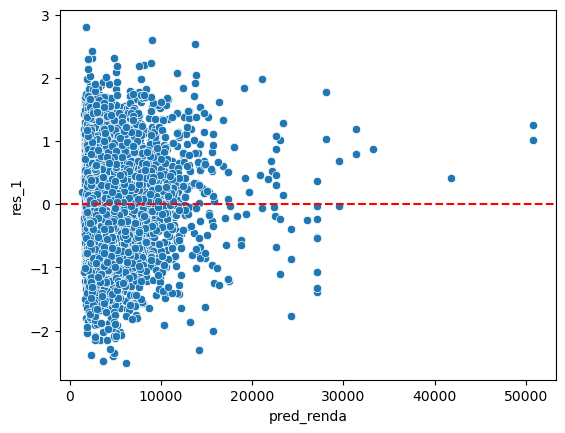

In [153]:
# Plot do resíduo

# Analisando o resíduo pode-se observar que a amplitude do resíduo está bem controlado, além disso os dados estão mais concentrados.

# Aparentemente o modelo consegue prever valores de renda abaixo de 15000, onde temos a maior concetração de dados.

sns.scatterplot(x='pred_renda', y='res_1', data = df_1)
plt.axhline(y=0, color='r', linestyle='--')